## Integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

When it comes to valuation and option pricing, integration is an important mathematical tool. This stems from the fact that risk-neutral values of derivatives can be expressed in general as the discounted expectation of their payoff under the risk-neutral (martingale) measure. The expectation in turn is a sum in the discrete case and an integral in the continuous case. The sublibrary <code>scipy.integrate</code> provides different functions for numerical integration:

In [2]:
import scipy.integrate as sci

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

We are interested in the integral over the interval [0.5, 9.5]; 

** Equation 4**. _Integral of example function_
$$ \int^{9.5}_{0.5}{sin(x) + 0.5x dx} $$

In [4]:
a = 0.5 # left integral limit 
b = 9.5 # right integral limit
x = np.linspace(0, 10)
y = f(x)

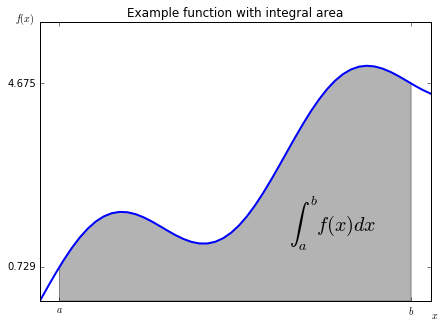

In [5]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(7, 5))
plt.title('Example function with integral area')
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

# area under the function
# between lower and upper limit
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

# labels
plt.text(0.75 * (a + b), 1.5, r'$\int_a^b f(x)dx$', 
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])

_Integration_ >
### Numerical Integration

The <code>integrate</code> sublibrary contains a selection of functions to numerically integrate a given mathematical function given upper and lower integration limits. Examples are <code>fixed_quad</code> for _fixed Gaussian quadrature_, <code>quad</code> for _adaptive quadrature_, and <code>romberg</code> for _Romberg integration_:

In [6]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [7]:
sci.quad(f, a, b)[0]

24.374754718086752

In [8]:
sci.romberg(f, a, b)

24.374754718086713

There are also a number of integration functions that take as input list or ndarray objects with function values and input values. Examples are <code>trapz</code>, using the _trapezoidal_ rule, and <code>simps</code>, implementing _Simpson_’s rule:

In [9]:
xi = np.linspace(0.5, 9.5, 25)

In [10]:
sci.trapz(f(xi), xi)

24.352733271544516

In [11]:
 sci.simps(f(xi), xi)

24.374964184550748

_Integration_ >
### Integration by Simulation

The valuation of options and derivatives by Monte Carlo simulation rests on the insight that you can evaluate an integral by simulation. Draw $I$ random values of $x$ between the integral limits and evaluate the integration function at every random value of $x$. Sum up all the function values and take the average to arrive at an average function value over the integration interval. Multiply this value by the length of the integration interval to derive an estimate for the integral value.

In [12]:
for i in range(1, 20): 
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a 
    print(np.sum(f(x)) / len(x) * (b - a))

24.8047622793
26.5229188983
26.2655475192
26.0277033994
24.9995418144
23.8818101416
23.5279122748
23.507857659
23.6723674607
23.6794104161
24.4244017079
24.2390053468
24.115396925
24.4241919876
23.9249330805
24.1948421203
24.1173483782
24.1006909297
23.7690510985
